In [ ]:
pip install ultralytics
pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.8/872.8 kB 23.6 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.models import load_model
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
from PIL import Image

In [23]:
def plate_detect(img_path,model_path='/content/drive/MyDrive/plate/plate.pt'):
  model2 = YOLO(model_path)
  try:
    results = model2.predict(source=img_path)
    img1 = results[0].plot()
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img1 = Image.fromarray(img1)
    img = cv2.imread(img_path)
    results = model2.predict(source=img_path)
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            license_plate = img[y1:y2, x1:x2]
            cv2.imwrite('lp.jpg', license_plate)
            break
    image = license_plate
    gray = cv2.cvtColor(license_plate, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    min_area = 50
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]
    bounding_boxes = [cv2.boundingRect(cnt) for cnt in filtered_contours]
    bounding_boxes = sorted(bounding_boxes, key=lambda box: (box[0], box[1]))
    for i, (x, y, w, h) in enumerate(bounding_boxes):
        roi = image[y:y+h, x:x+w]
        cv2.imwrite(f'letter_{i}.jpg', roi)
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.imwrite('lp.jpg', image)
    cv2_imshow(image)
    cv2.destroyAllWindows()
  except:
    image = cv2.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    min_area = 50
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]
    bounding_boxes = [cv2.boundingRect(cnt) for cnt in filtered_contours]
    bounding_boxes = sorted(bounding_boxes, key=lambda box: (box[0], box[1]))
    for i, (x, y, w, h) in enumerate(bounding_boxes):
      roi = image[y:y+h, x:x+w]
      cv2.imwrite(f'letter_{i}.jpg', roi)
      cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.imwrite('lp.jpg', image)
    cv2_imshow(image)
    cv2.destroyAllWindows()


image 1/1 /content/en2.webp: 1024x1024 1 licence, 1 number_plate, 570.5ms
Speed: 13.2ms preprocess, 570.5ms inference, 1.8ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 /content/en2.webp: 1024x1024 1 licence, 1 number_plate, 569.2ms
Speed: 15.6ms preprocess, 569.2ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


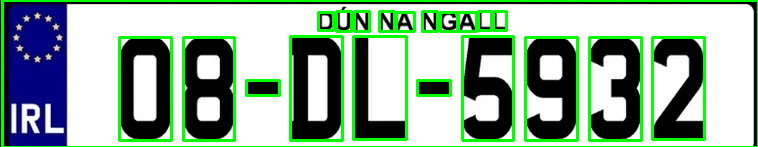

In [26]:
plate_detect('/content/en2.webp')


In [ ]:
import os
def letter_detect(address,model_path='/content/drive/MyDrive/plate/alefba_model2.h5'):
  model = load_model(model_path)
  plate=[]
  alpha= ['','1','2','3','4','5','6','7','8','9','Alef','B','SIN','D','E','GH','H','H jimi','L','M','N','SAD','TA','V','Y']
  try:
    for i  in range (1,20):
      img = cv2.imread(f'/{address}/letter_{i}.jpg', cv2.IMREAD_GRAYSCALE)
      img = cv2.resize(img, (128, 128))
      img_reshaped = img.reshape((1, 128, 128, 1))
      img
      answers= model.predict(img_reshaped)
      ans= np.argmax(answers)
      if(len(plate)<2 and ans<9):
        ans +=1
        plate.append(alpha[ans])
      elif(len(plate)==8):
        break
      elif(len(plate)==2 and ans>=9):
        ans +=1
        plate.append(alpha[ans])
      elif(len(plate)>2 and ans<9):
        ans +=1
        plate.append(alpha[ans])
      else:
        continue
    for i in range(0,10):
      os.remove(f'letter_{i}.jpg')
    return(plate)
  except:
    for i in range(0,10):
      os.remove(f'letter_{i}.jpg')
    return(plate)
def letter_detect_en(adrees='lp.jpg'):
  import cv2
  import easyocr
  image_path = 'lp.jpg'
  image = cv2.imread(image_path)
  reader = easyocr.Reader(['en'])
  result = reader.readtext(image)
  for (bbox, text, prob) in result:
      temp= text
  return (temp)

In [ ]:

for i in range(0,50):
  try:
    os.remove(f'letter_{i}.jpg')
  except:
    continue